In [72]:
import pandas as pd
import seaborn as sns
city_temps=pd.read_csv('GlobalLandTemperaturesByCity.csv')

                                                             
                                                             
                                                             
                                                             
                                                             
                                                             
                                                             
                                                             

In [73]:
city_temps_grouped

,City,year,Latitude,Longitude,temp_mean,temp_min,temp_max,pct
0,A Coruña,1743,42.59,-8.73,10.779000,10.779,10.779,NaN
1,A Coruña,1744,42.59,-8.73,13.678125,8.798,17.992,0.268960
2,A Coruña,1745,42.59,-8.73,9.170500,7.652,11.541,-0.329550
3,A Coruña,1746,42.59,-8.73,NaN,NaN,NaN,0.000000
4,A Coruña,1747,42.59,-8.73,NaN,NaN,NaN,0.000000
...,...,...,...,...,...,...,...,...
718326,Ürümqi,2009,44.20,87.20,7.287417,-12.470,23.904,-0.071814
718327,Ürümqi,2010,44.20,87.20,6.650083,-13.356,24.394,-0.087457
718328,Ürümqi,2011,44.20,87.20,6.806083,-20.973,24.971,0.023458
718329,Ürümqi,2012,44.20,87.20,6.600167,-17.588,24.375,-0.030255


In [74]:
city_temps['dt']=pd.to_datetime(city_temps.dt)

In [75]:
city_temps.dtypes

dt                               datetime64[ns]
AverageTemperature                      float64
AverageTemperatureUncertainty           float64
City                                     object
Country                                  object
Latitude                                 object
Longitude                                object
dtype: object

In [76]:
city_temps['year']=city_temps['dt'].dt.year
city_temps.dropna()
city_temps

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude,year
0,1743-11-01,6.068,1.737,Århus,Denmark,57.05N,10.33E,1743
1,1743-12-01,NaN,NaN,Århus,Denmark,57.05N,10.33E,1743
2,1744-01-01,NaN,NaN,Århus,Denmark,57.05N,10.33E,1744
3,1744-02-01,NaN,NaN,Århus,Denmark,57.05N,10.33E,1744
4,1744-03-01,NaN,NaN,Århus,Denmark,57.05N,10.33E,1744
...,...,...,...,...,...,...,...,...
8599207,2013-05-01,11.464,0.236,Zwolle,Netherlands,52.24N,5.26E,2013
8599208,2013-06-01,15.043,0.261,Zwolle,Netherlands,52.24N,5.26E,2013
8599209,2013-07-01,18.775,0.193,Zwolle,Netherlands,52.24N,5.26E,2013
8599210,2013-08-01,18.025,0.298,Zwolle,Netherlands,52.24N,5.26E,2013


In [77]:
city_temps_grouped = city_temps.groupby(['City','year','Latitude','Longitude']).agg({'AverageTemperature':['mean','min','max']})
city_temps_grouped .columns = ['temp_mean', 'temp_min', 'temp_max']
city_temps_grouped =city_temps_grouped.reset_index()

In [78]:
city_temps_grouped[city_temps_grouped['City']=='San Francisco']
                   

,City,year,Latitude,Longitude,temp_mean,temp_min,temp_max
550711,San Francisco,1849,37.78N,122.03W,14.120250,6.278,21.542
550712,San Francisco,1850,37.78N,122.03W,13.797083,6.628,20.839
550713,San Francisco,1851,37.78N,122.03W,14.390667,7.662,20.583
550714,San Francisco,1852,37.78N,122.03W,13.811417,7.853,20.349
550715,San Francisco,1853,37.78N,122.03W,14.402750,7.711,19.593
...,...,...,...,...,...,...,...
550871,San Francisco,2009,37.78N,122.03W,15.019750,8.381,20.950
550872,San Francisco,2010,37.78N,122.03W,14.670917,9.599,20.020
550873,San Francisco,2011,37.78N,122.03W,14.496583,9.118,20.540
550874,San Francisco,2012,37.78N,122.03W,15.051583,8.950,20.531


/usr/local/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='year', ylabel='temp_mean'>

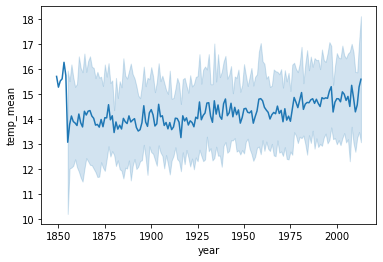

In [79]:

x=city_temps_grouped['year'][city_temps_grouped['City']=='Los Angeles']
y=city_temps_grouped['temp_mean'][city_temps_grouped['City']=='Los Angeles']
sns.lineplot(x, y)

In [80]:
def dms2dd(s):
   
    degrees = s[:len(s)-1]
    direction = s[len(s)-1]
    dd = float(degrees)
    if direction in ('S','W'):
        dd*= -1
    return dd


In [81]:
city_temps_grouped['Latitude']=city_temps_grouped['Latitude'].apply(dms2dd)



In [82]:
city_temps_grouped['Longitude']=city_temps_grouped['Longitude'].apply(dms2dd)

In [83]:
city_temps_grouped.to_csv('city_temps.csv')

In [86]:
city_temps_grouped

,City,year,Latitude,Longitude,temp_mean,temp_min,temp_max
0,A Coruña,1743,42.59,-8.73,10.779000,10.779,10.779
1,A Coruña,1744,42.59,-8.73,13.678125,8.798,17.992
2,A Coruña,1745,42.59,-8.73,9.170500,7.652,11.541
3,A Coruña,1746,42.59,-8.73,NaN,NaN,NaN
4,A Coruña,1747,42.59,-8.73,NaN,NaN,NaN
...,...,...,...,...,...,...,...
718326,Ürümqi,2009,44.20,87.20,7.287417,-12.470,23.904
718327,Ürümqi,2010,44.20,87.20,6.650083,-13.356,24.394
718328,Ürümqi,2011,44.20,87.20,6.806083,-20.973,24.971
718329,Ürümqi,2012,44.20,87.20,6.600167,-17.588,24.375


In [124]:

city_temps_avg = city_temps_grouped[city_temps_grouped['year']<1889].groupby(['City','Latitude','Longitude']).temp_mean.mean()
city_temps_avg.columns = ['pre_1889_avg'];
city_temps_avg_2013 = city_temps_grouped[city_temps_grouped['year']>1889].groupby(['City','Latitude','Longitude']).temp_mean.mean()
pd.DataFrame(city_temps_avg)
pd.DataFrame(city_temps_avg_2013)

                                                                                   
                                                                                   
                                                                                   

,,,temp_mean
City,Latitude,Longitude,
A Coruña,42.59,-8.73,13.373481
Aachen,50.63,6.34,9.084514
Aalborg,57.05,10.33,7.991283
Aba,5.63,8.07,26.713860
Abadan,29.74,48.00,25.208237
...,...,...,...
Århus,57.05,10.33,7.991283
Çorlu,40.99,27.69,13.578186
Çorum,40.99,34.08,10.222971


In [128]:
city_temps_diff = pd.DataFrame(city_temps_avg_2013-city_temps_avg)
city_temps_diff
city_temps_diff.to_csv('Temperature_differences.csv')
